## Linear Regression
<br>  
**Objectives**  
- Use sklearn library to train linear regression models
- Analyze and evaluate suitability of linear regression models
- Use linear regression and decomposition results to forecast the time-series data

**quick review of lec04**
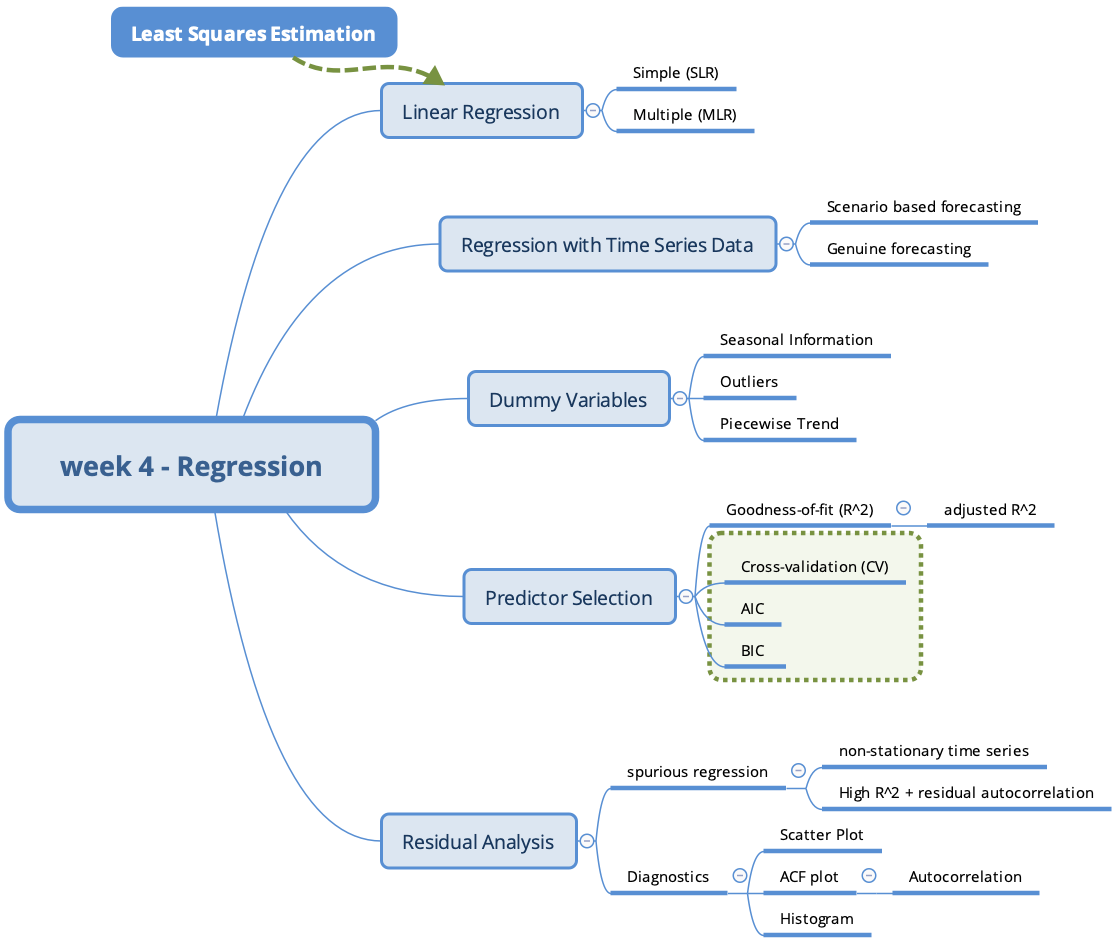

**quick review of tut04**  
1. initial trend-cycle component  
    - moving average *CMA-m*  
    `rolling(m).mean()`


2. seasonal index  
    - average value  
    `np.reshape()`   
    `np.mean(array, axis = 0)`  
    - normalization  
    `array.mean()`  
    `np.tile(array, num)`    


3. de-seasonalized series   

In this tutorial, we will apply the <span class="girk">basic linear regression</span> to predict the beer sales. More specifically, we will use a linear regression model to generate the <span class="mark">trend estimation</span> and then combine this trend with <span class="mark">seasonal index</span> as forecasting results.

### 1.	Linear regression model in sklearn library

<br>

#### Step 1: Load the Data and Visual Inspection

Create a new Python script called “`tutorial_05.py`” and download the “`beer.txt`” file from the QBUS6840 Canvas site.
Begin our script by importing necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%config InlineBackend.figure_format='retina'

from sklearn.linear_model import LinearRegression # the new library for us to do modelling works

Then read the data file into the beer_df dataframe variable

In [2]:
beer_df = pd.read_csv('beer.txt')

# .csv, .txt, .xlsx
pd.read_csv('beer.txt')
pd.read_excel('beer.xlsx')

In [86]:
beer_df.head()

,Sales
0,164
1,148
2,152
3,144
4,155


In [33]:
np.linspace(1, 2, 5)

array([1.  , 1.25, 1.5 , 1.75, 2.  ])

Confirm that the data was loaded successfully by plotting the beer sales data.

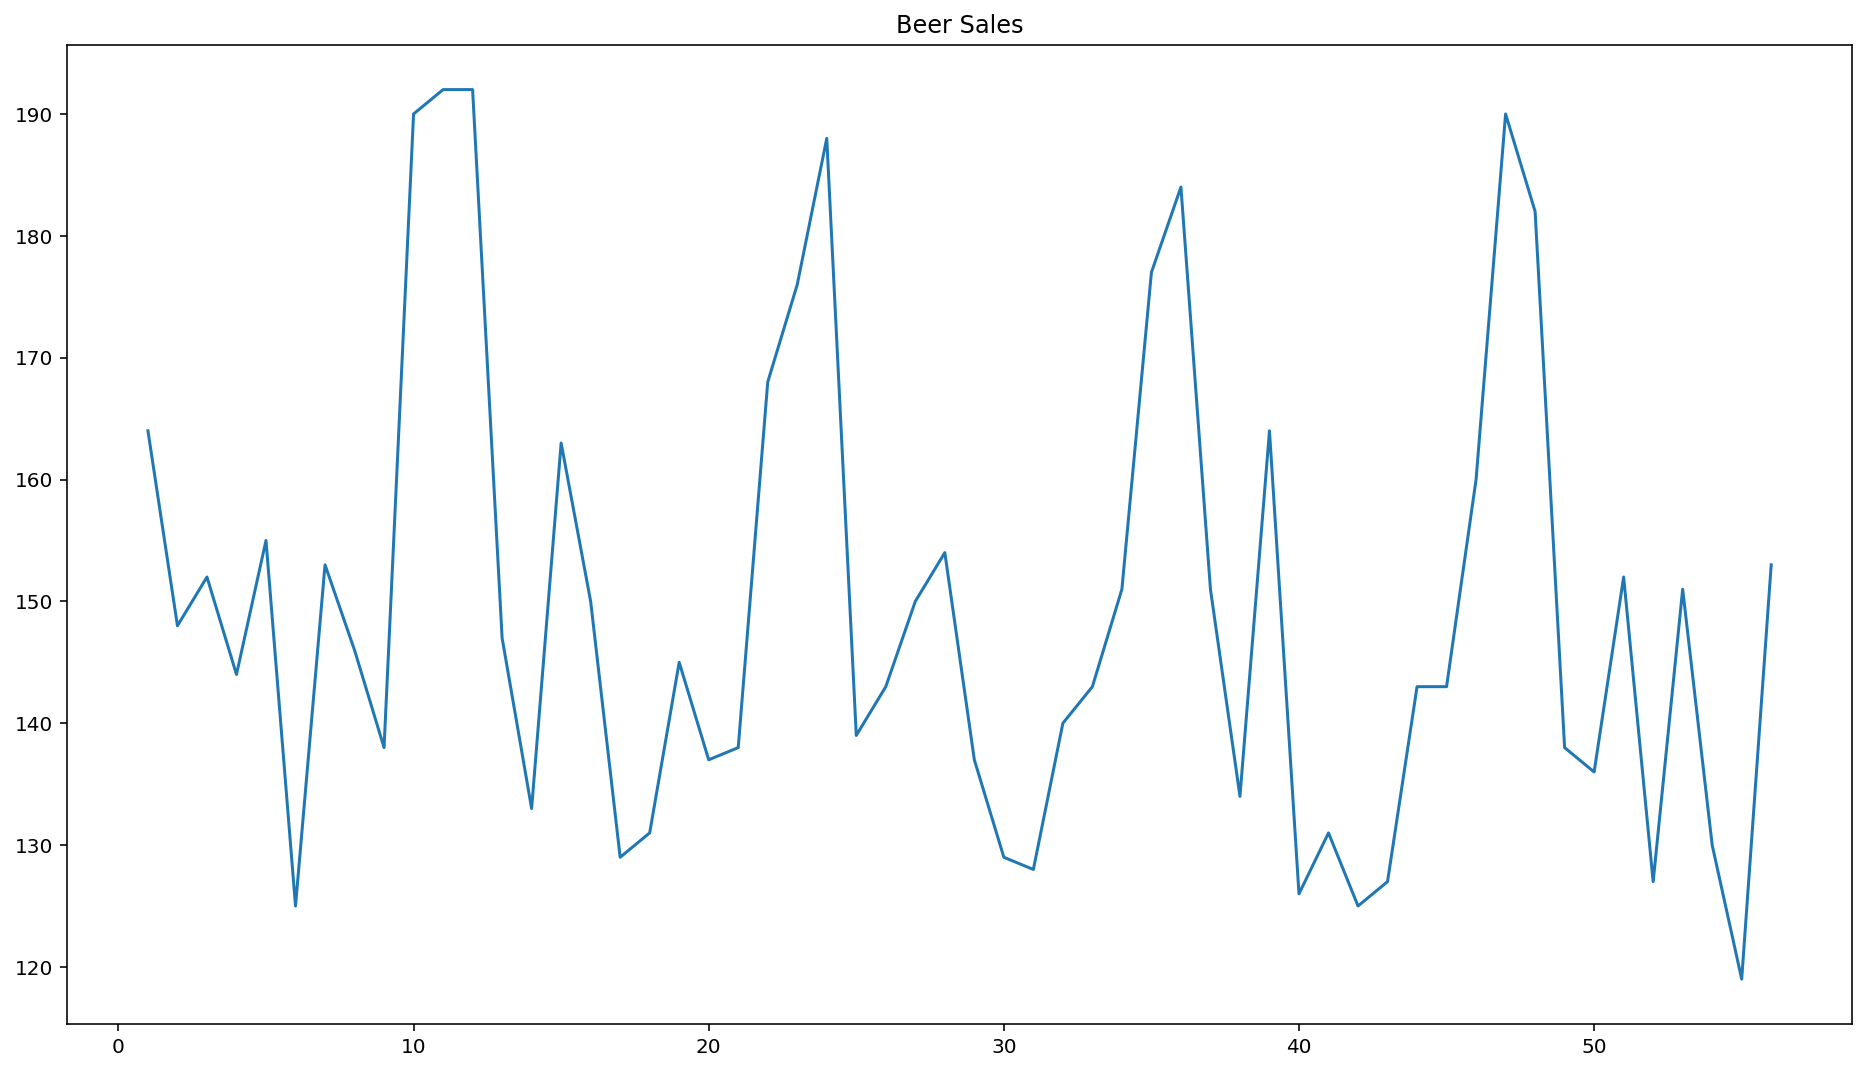

In [3]:
X = np.linspace(1, 56, 56) #### (start, stop, amount)
# np.linspace is used to generate an array of numbers from the smallest to the largest.
# for example, if we set np.linspace(a,b,c), it defines the first number as a, and the last number as b
# moreover, we have a total of c numbers within the array

y = beer_df['Sales']
# similar as before, we select 'sales' column in beer_df dataframe as a series. 

plt.figure(figsize = (16, 9))
plt.plot(X, y) # we use the values of (X,y) as each of the points in our line plot.
plt.title("Beer Sales");

Question: What is the datatype and size of X and y?

In [9]:
# question (1) datatype of X
X.dtype

dtype('float64')

In [8]:
# question (2) datatype of Y
y.dtype

dtype('int64')

In [12]:
# question (3) size of X
X.size

56

In [13]:
# question (4) size of Y
y.size

56

#### Step 2: Regress beer sales against time

To regress beer sales we can use the scikit learn LinearRegression object. It takes care of <span class="girk">fitting the model and calculating predictions</span> for us.

First we need to prepare variables for linear regression


In [4]:
X = np.reshape(X, (len(beer_df), 1))
# we need to convert the X variable from 1D array to 2D.
# otherwise error would arise when using LinearRegression in the next step

# (56,)
# (56, 1)

The above is very import. We must convert the training data into to 2D shape (matrices). This is the fundamental data structure requirement of `sklearn` package.  

In the above case, variable X’s data type is a 1D array of float64. You may think of it as a series of values. However all the sklearn modeling methods take training data as 2D array. We use `X = np.reshape(X, (len(beer_df), 1))` clearly convert X into a one column shape in size `(len(beer_df), 1)`. Same to y.

Create a new `LinearRegression()` object and assign this object to a new variable:

In [5]:
lm = LinearRegression()

Generally, once you create a new variable, you can always find its name in the Variable Explorer. However, `LinearRegression()` object can’t be visualized as specific numbers or strings. Therefore, you cannot see `lm` variable in the Variable Explorer.   

In this case, if you want to know the details of this `lm` variable, you can type the variable name `lm` in the IPython Console and check the details of the object settings. Below is an example:

In [6]:
lm
# check the detailed settings of the defined model
# 'lm' is the model's name you gave before

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

The above message tells us that we have defined a linear regression model which will fit the intercept and make a copy of the data when fitting the model.

Train the model by using the `fit()` function

In [6]:
lm.fit(X, y);
# use X, y (your training data) to fit the model (find the coefs)

`sklearn` hides the fitted parameters inside the model variable (in this case `lm`). We can extract these information by accessing models’ relevant attributes. The following is <span class="girk">an example of printing out parameters from our model</span>

In [7]:
# The coefficients
print("Coefficients: {0}".format(lm.coef_[0]))
# The intercept
print("Intercept: {0}".format(lm.intercept_))

# the model
print("Total model: y = {0} + {1} X".format(lm.intercept_, lm.coef_[0]))

# Calculate R-squared by feeding back the original data points into the model.
# 'score' is used for calculating R^2
print("Variance score (R^2): {0:.2f}".format(lm.score(X, y)))

Coefficients: -0.21425153793574842
Intercept: 155.40974025974026
Total model: y = 155.40974025974026 + -0.21425153793574842 X
Variance score (R^2): 0.03


Question: what is the meaning of "`{0:.2f}`"?

In [35]:
# compare the results with and without {0:.2f}
print("Variance score (R^2): {0:.4f}".format(lm.score(X, y)))
print("Variance score (R^2): {}".format(lm.score(X, y)))

Variance score (R^2): 0.0310
Variance score (R^2): 0.03099040879036763


Plot the predictions/trend from the model. You can use `predict()` function for forecasting the test data.

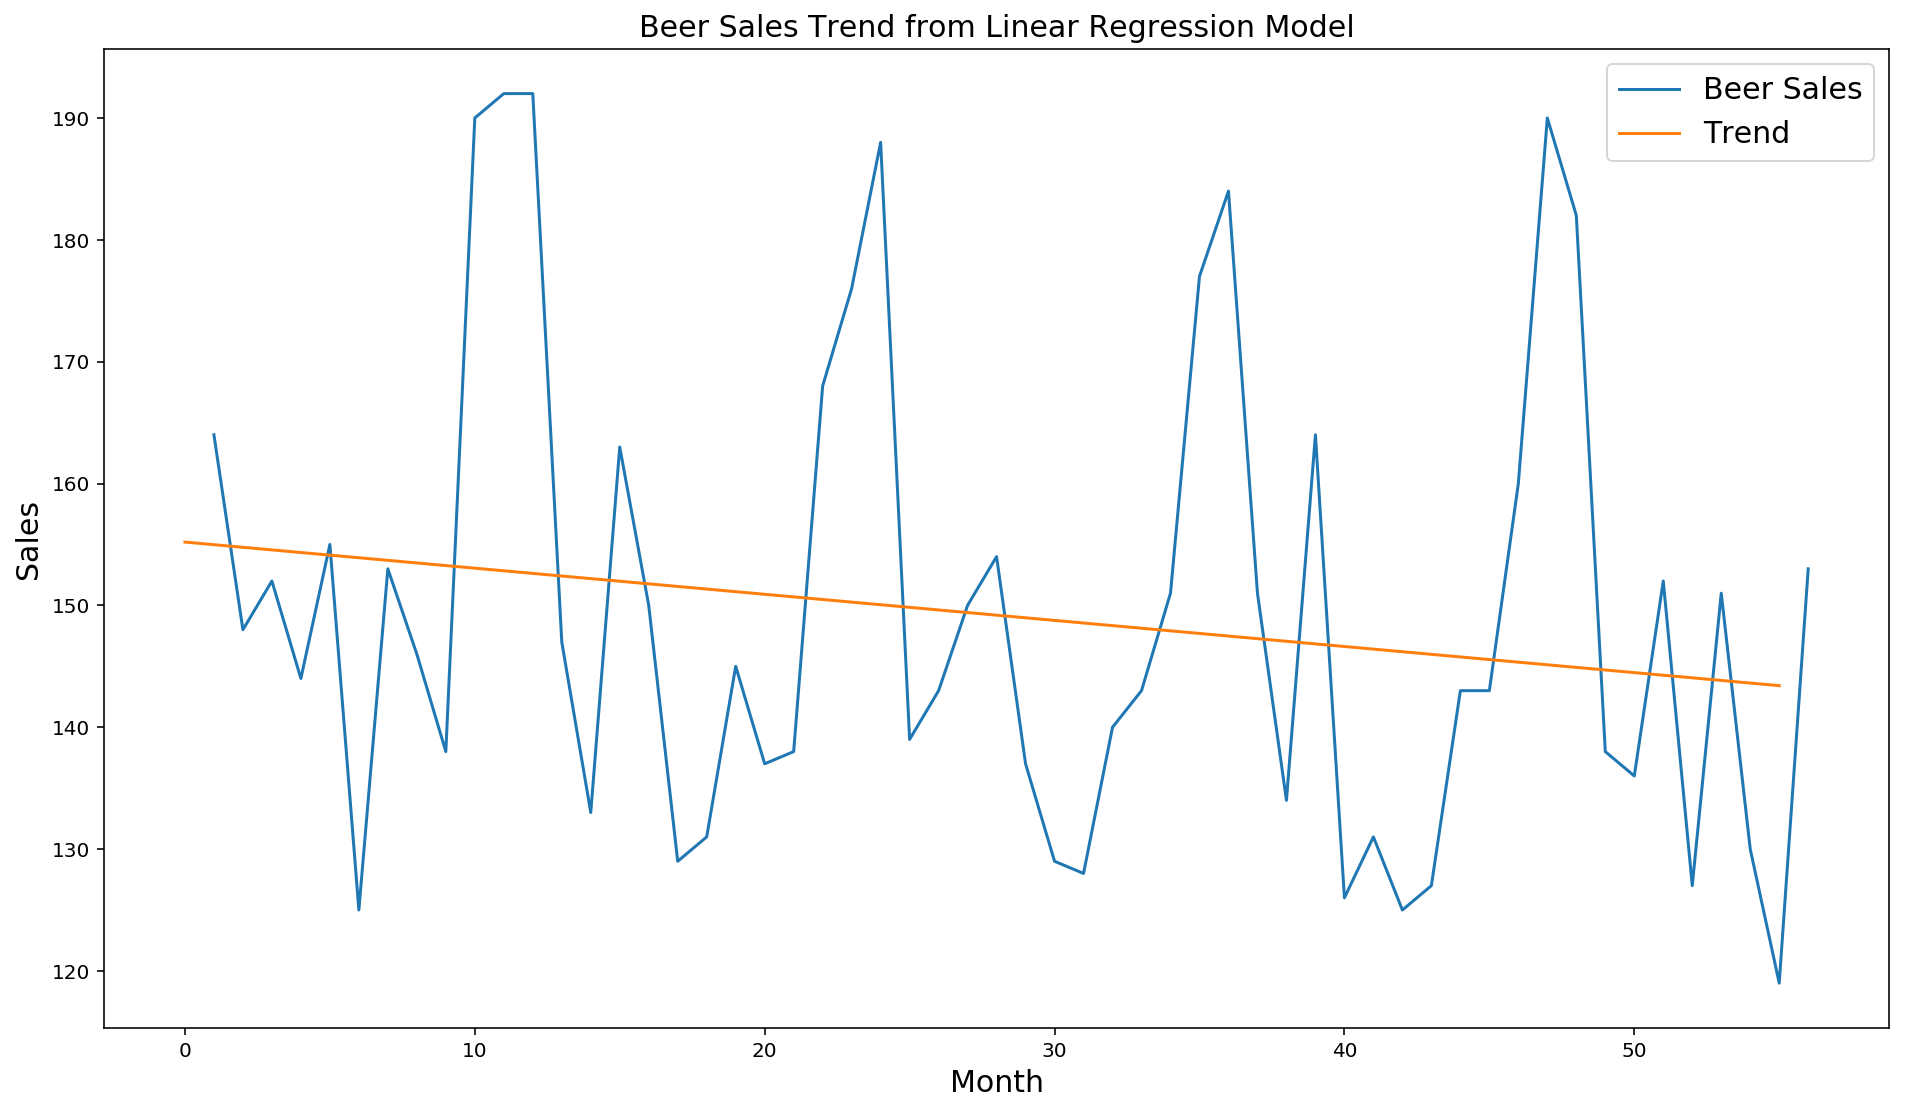

In [8]:
trend = lm.predict(X) # use X_test to get y_test

plt.figure(figsize = (16, 9))
plt.plot(X, y, label = "Beer Sales")
plt.plot(trend, label="Trend")
plt.legend(fontsize = 15)
plt.title("Beer Sales Trend from Linear Regression Model", fontsize = 15)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Sales", fontsize = 15)
plt.show(block = False)

Question:  What is the meaning of `trend = lm.predict(X)`? 

In [11]:
# check the orange line
trend

array([155.19548872, 154.98123718, 154.76698565, 154.55273411,
       154.33848257, 154.12423103, 153.90997949, 153.69572796,
       153.48147642, 153.26722488, 153.05297334, 152.8387218 ,
       152.62447027, 152.41021873, 152.19596719, 151.98171565,
       151.76746411, 151.55321258, 151.33896104, 151.1247095 ,
       150.91045796, 150.69620643, 150.48195489, 150.26770335,
       150.05345181, 149.83920027, 149.62494874, 149.4106972 ,
       149.19644566, 148.98219412, 148.76794258, 148.55369105,
       148.33943951, 148.12518797, 147.91093643, 147.69668489,
       147.48243336, 147.26818182, 147.05393028, 146.83967874,
       146.6254272 , 146.41117567, 146.19692413, 145.98267259,
       145.76842105, 145.55416951, 145.33991798, 145.12566644,
       144.9114149 , 144.69716336, 144.48291183, 144.26866029,
       144.05440875, 143.84015721, 143.62590567, 143.41165414])

Calculate SSE or use the `._residues` attribute

In [9]:
# SSE: sum of squared errors
# error -> squared(error) -> sum(squared(error))
sse1 = np.sum(np.power(y - trend, 2), axis = 0)
# np.square(value) = np.power(value,2)

sse2 = lm._residues

print(sse1)
print(sse2)

20464.267840054687
20464.267840054683


For more details about `LinearRegression()` object in `sklearn` library, please refer to the following link:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

<br>

#### Step 3: Evaluate the model

With time series data it is highly likely that the value of a variable observed in the current time period will be <span class="girk">influenced by its value in the previous period</span>, or even the period before that, and so on.

When fitting a regression model to time series data, it is very common to find <span class="girk">autocorrelation</span> in the residuals, which violates the assumption of no autocorrelation in the errors.

Some information left over should be utilized in order to obtain better forecasts. Therefore, we need to apply the <span class="burk">autocorrelation function (ACF)</span> [Note: We will talk about ACF later on in lecture. Here we simply learn how to use them.] on the residual. Suppose, $e_t$ denote the residual of a time series at time $t$. The ACF of the series gives correlations between $e_t$ and $e_{t-i}$ for $i = 1,2,3$, etc. Theoretically, the autocorrelation between $e_t$ and $e_{t-i}$ equals:

$$\frac{Covariance\;(e_t,e_{t-i})}{Std(e_t)\times Std(e_{t-i})} =  \frac{Covariance\;(e_t,e_{t-i})}{Variance(e_t)}$$

Note that the denominator in the second formula occurs because the <span class="burk">standard deviation of a stationary series is the same at all times</span>.

Let’s plot and inspect the ACF. This will show us the autocorrelation. In here we set the interval $i = 1,2,…,15$

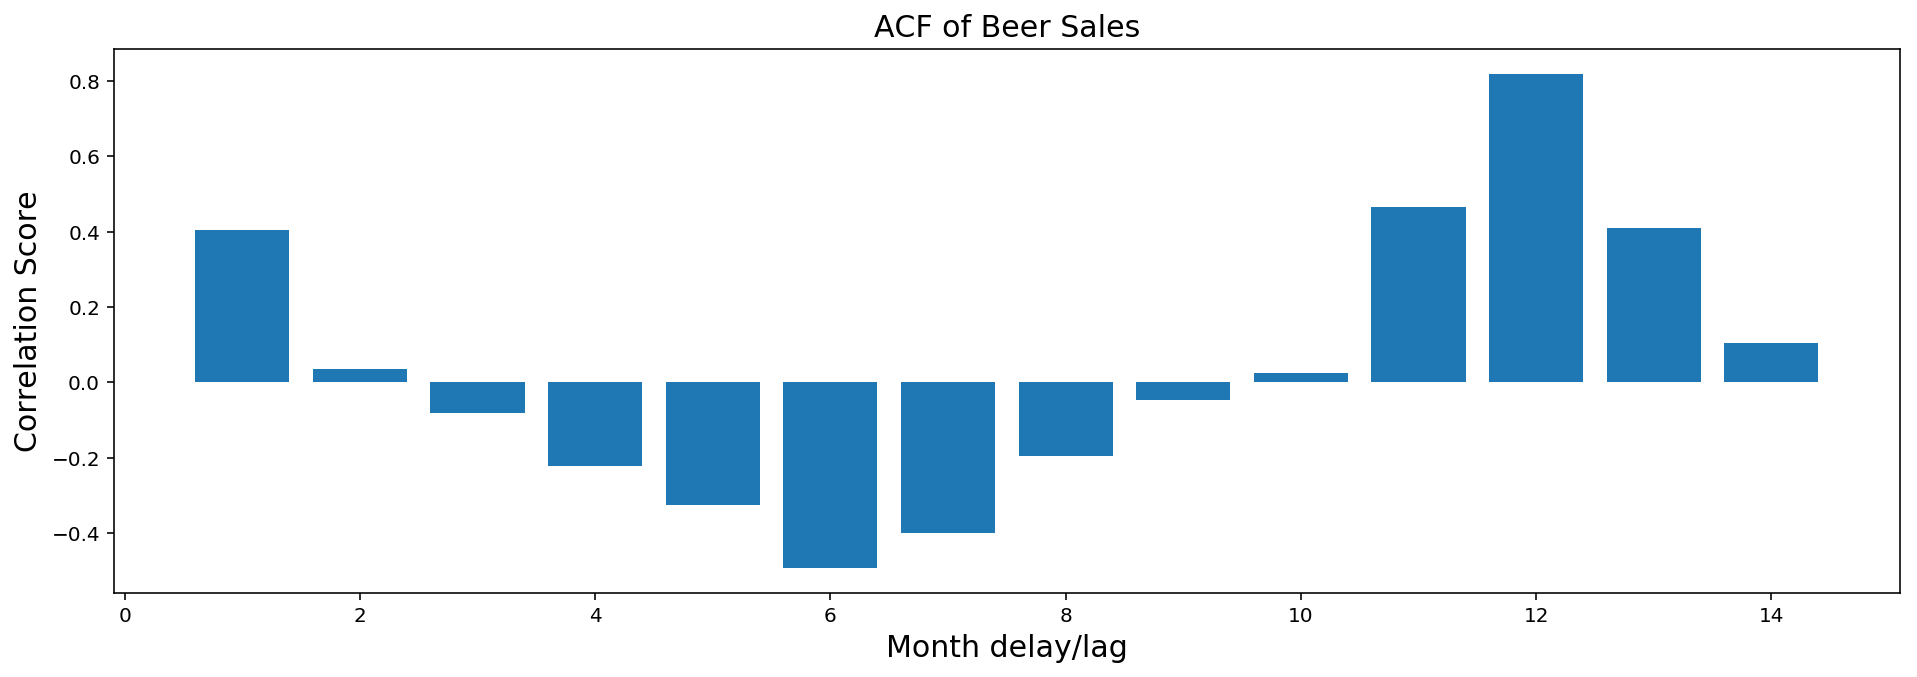

In [10]:
beer_df['residuals'] = y - trend  # y - y_hat

acf_vals = [beer_df['residuals'].autocorr(i) for i in range(1,15) ] 
# find autocorrelation for y_t and y_t-1, y_t and y_t-2 ... y_t and y_t-14
# why t-1 ~ t-14: range(1,15) = 1, 2, 3, ..., 12, 13, 14

plt.figure(figsize = (16, 5))
plt.bar(np.arange(1, 15), acf_vals)
plt.title("ACF of Beer Sales", fontsize = 15)
plt.xlabel("Month delay/lag", fontsize = 15)
plt.ylabel("Correlation Score", fontsize = 15);

In [ ]:
[Y_t, Y_t-1, Y_t-2, ... Y_t-k]
     [Y_t-2, Y_t-3, ... Y_t-k-2]

In [11]:
np.arange(1,16)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

**Question**:   
(1)	What phenomenon you could observe?  
(2)	Since our data appears in yearly repeatable pattern, what will happen if we extend the lag interval from 15 to 25?  


In [ ]:
# question (1): m = 12

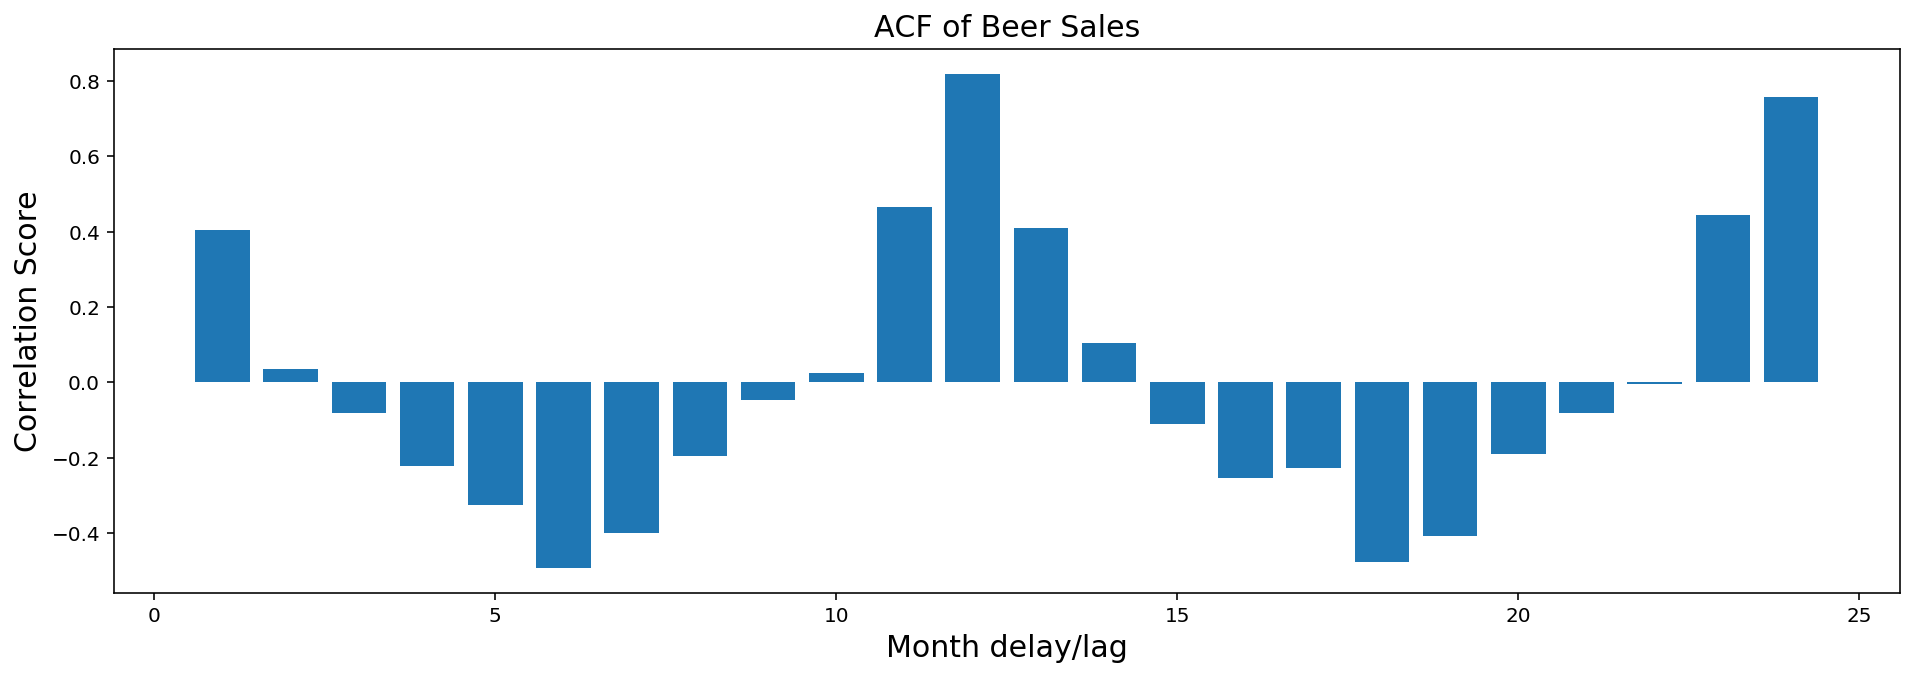

In [12]:
# question (2)
beer_df['residuals'] = y - trend

acf_vals = [beer_df['residuals'].autocorr(i) for i in range(1,25) ] # 15 -> 25

plt.figure(figsize = (16, 5))
plt.bar(np.arange(1, 25), acf_vals) # (1, 15) -> (1, 25)
plt.title("ACF of Beer Sales", fontsize = 15)
plt.xlabel("Month delay/lag", fontsize = 15)
plt.ylabel("Correlation Score", fontsize = 15);


We also need to inspect the residual plot (X vs residual). A <span class="mark">random distribution</span> means the model has captured the trend accurately.

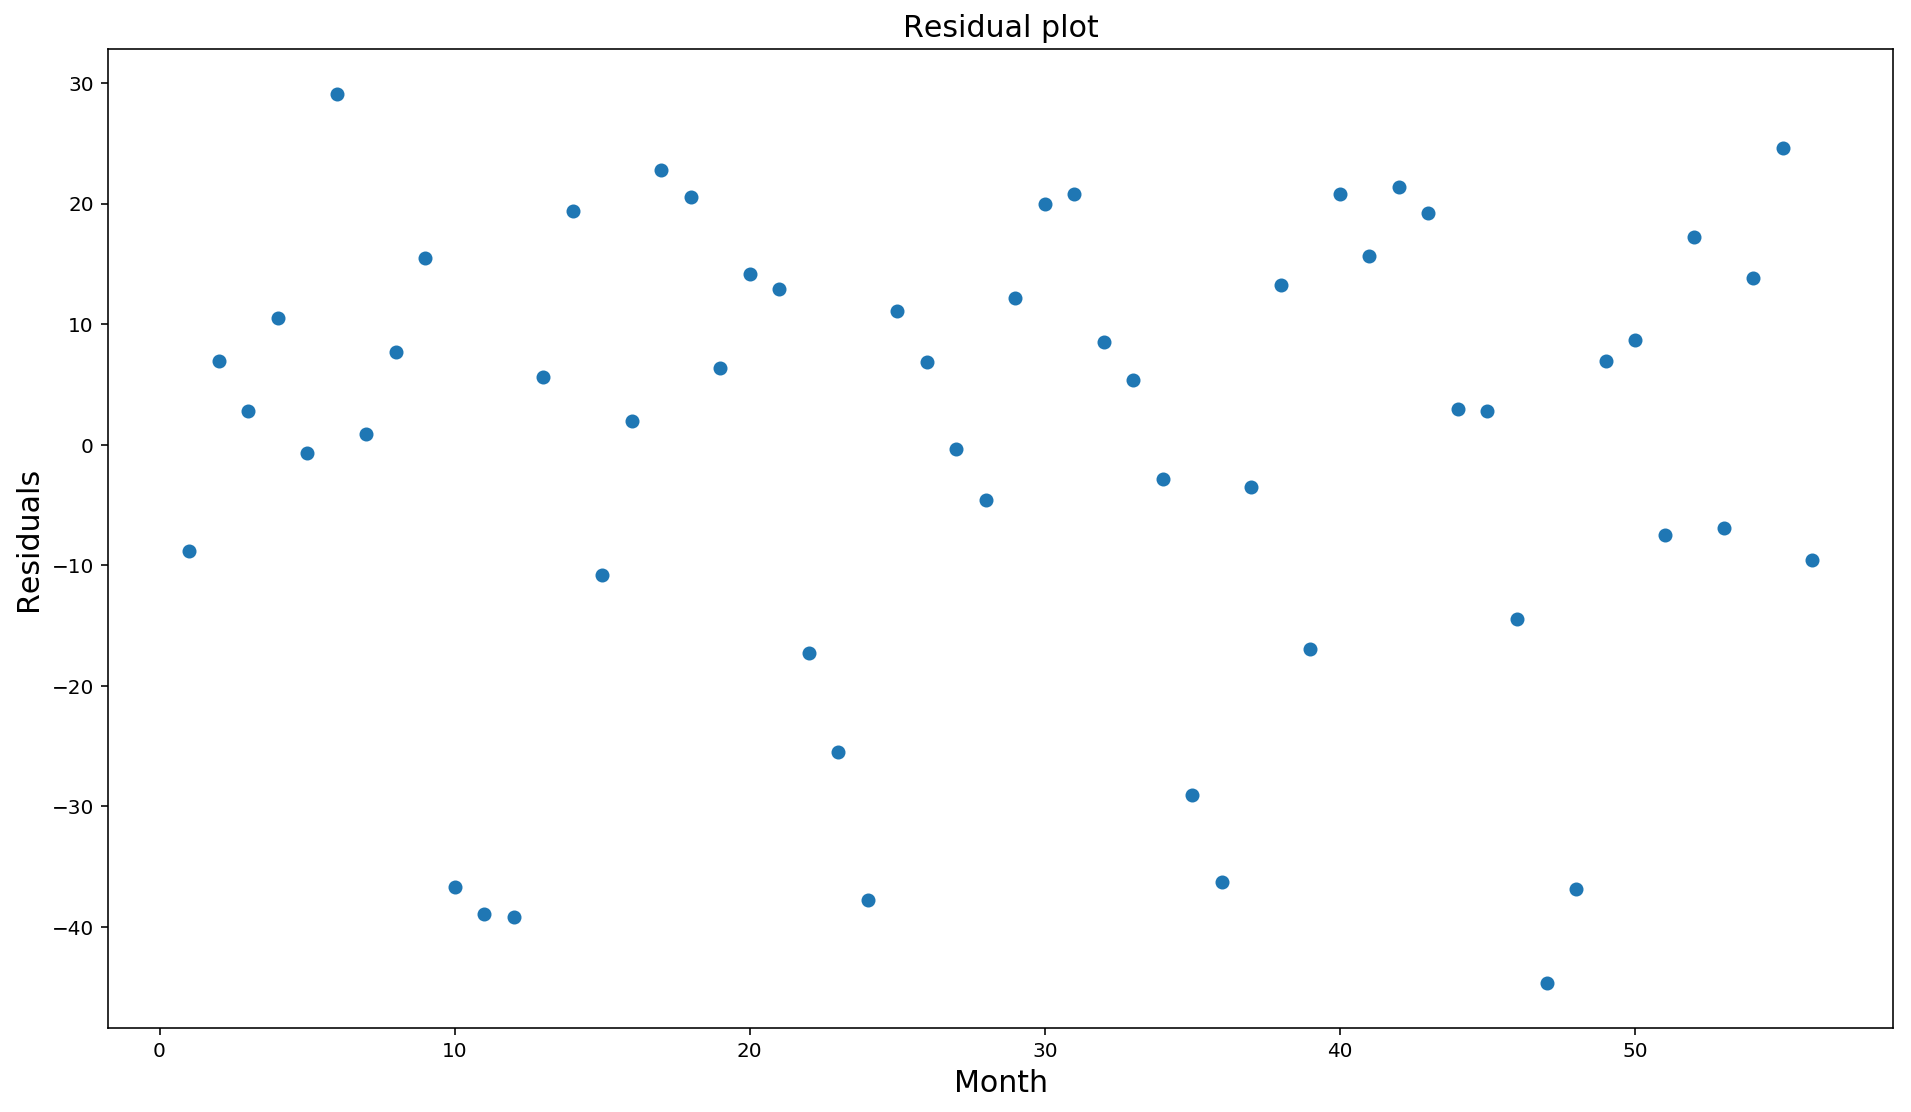

In [13]:
plt.figure(figsize = (16, 9))
plt.title("Residual plot", fontsize = 15)
plt.scatter(X, trend - y)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Residuals", fontsize = 15);

<br>

#### Step 4: Predict the test data

We can use the raw data to predict our sales trend. This will give you a very rough and approximate prediction.

In [ ]:
# np.arange()
for i in np.arange(5):
    print(i)

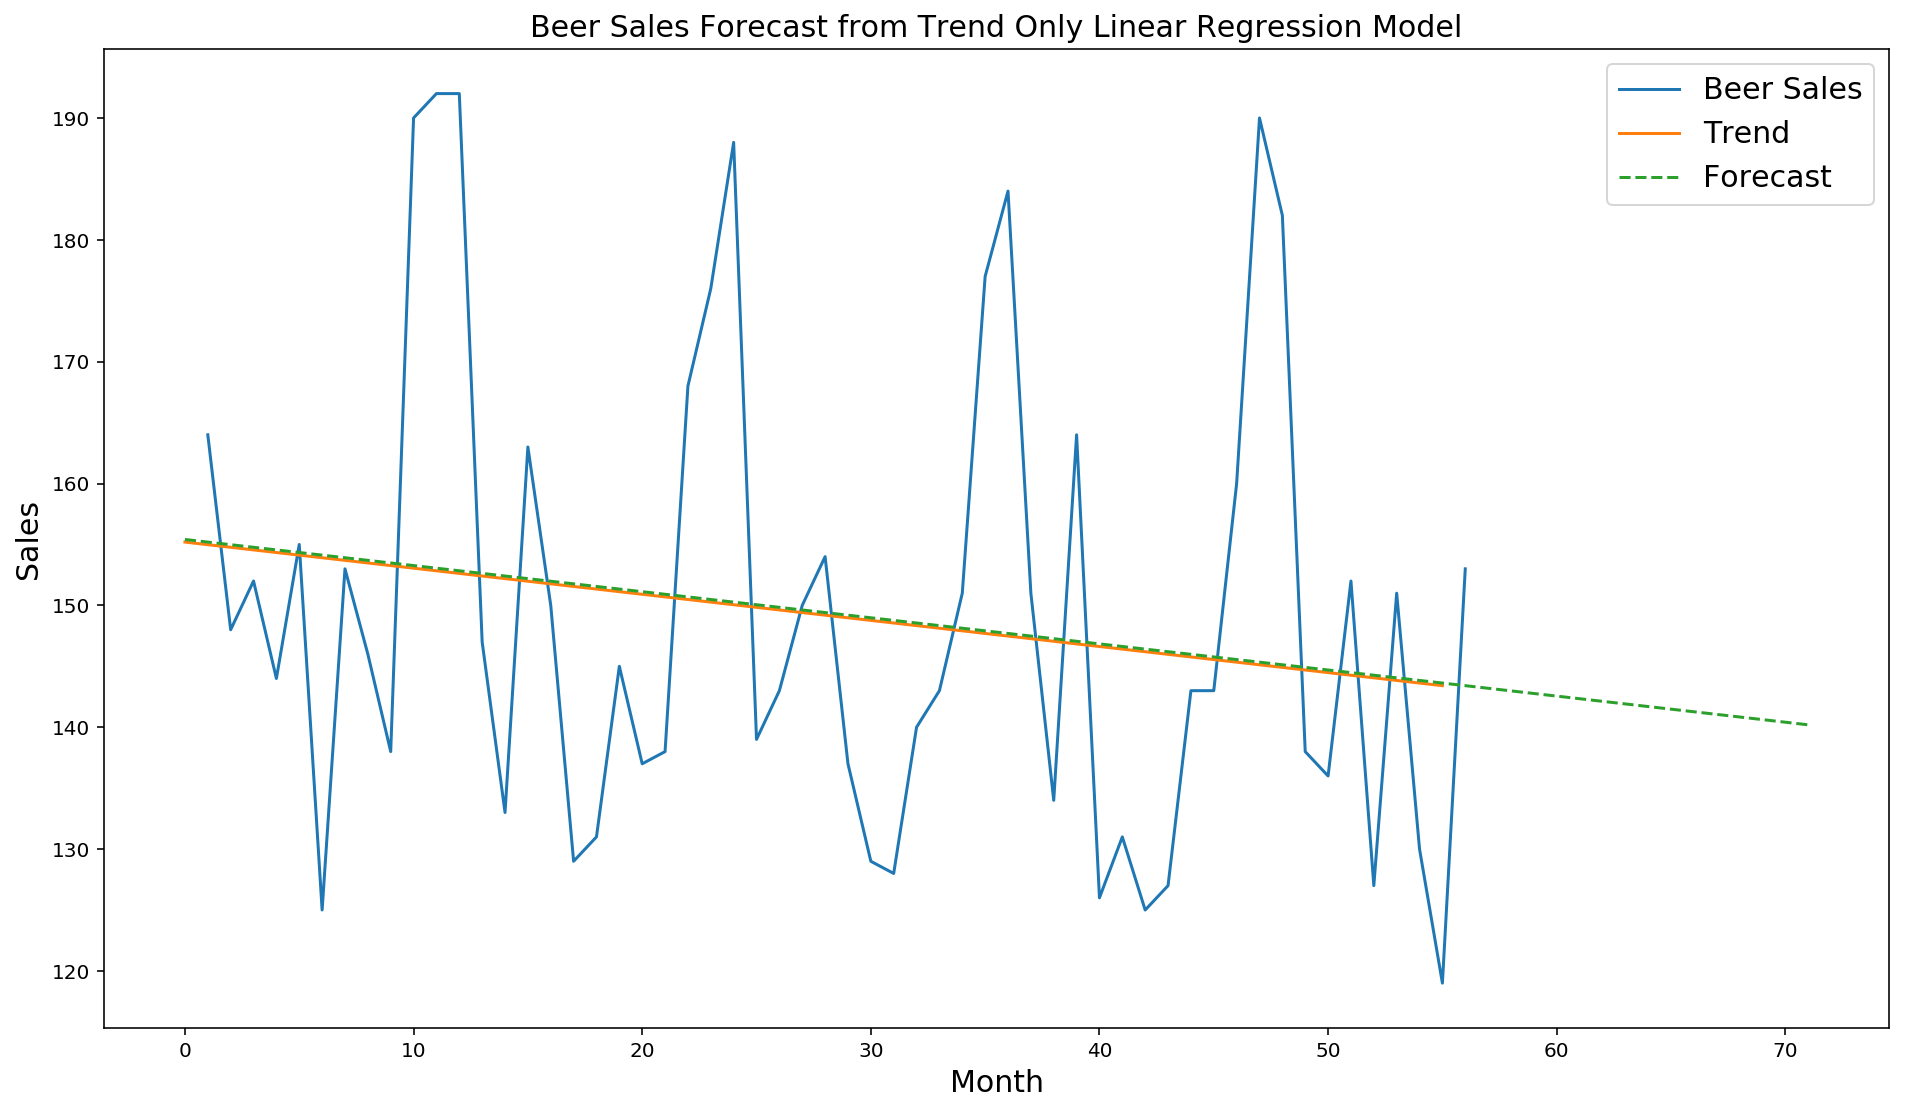

In [14]:
forecast = lm.predict(np.reshape(np.arange(72), (72,1)))
# x = 0, 1, 2, ..., 71. A total of 72 months

plt.figure(figsize = (16, 9))
plt.plot(X, y, label = "Beer Sales")
plt.plot(trend, label = "Trend")
plt.plot(forecast, linestyle = '--', label = "Forecast") # '--' indicates dashed line
plt.legend(fontsize = 15)
plt.title("Beer Sales Forecast from Trend Only Linear Regression Model", fontsize = 15)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Sales", fontsize = 15);

### 2. Using linear regression for forecasting

In the previous task, we have trained a linear regression model. One thing you should notice is that this linear regression could only be used to <span class="girk">generate/forecast the trend component</span> $\hat{T_t}$  rather than the entire time-series sequence $\hat{y_t}$.

Generally, in order to obtain a more accurate result, you need to decompose your original data into trend(-cycle) and seasonal index, and then use forecasted trend component combined with seasonal index to do the forecasting.

<br>

#### Step 1: Predict the Sales Trend using trend and seasonal components

A more accurate method is to decompose into trend and seasonal components. Then we can add the seasonal components back in for a more accurate model.

We first using a 12 x 2 moving average to extract the initial trend. And then use this initial trend to calculate the seasonal component.


In [15]:
# get initial TC component with CMA-12
T = beer_df.rolling(12, center = True).mean().rolling(2, center = True).mean().shift(-1)

# extract seasonal index from the additive decomposition model
S_additive = beer_df['Sales'] - T['Sales']

Exam you `S_additive` variable, How many missing value in the beginning? What is the size of this variable?

In [98]:
# check the NaN values in S_additive variable, after the MA step
print(S_additive.head(7))
S_additive.tail(7)
# 6 + 44 + 6

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6   -4.541667
Name: Sales, dtype: float64


49   -12.0
50     NaN
51     NaN
52     NaN
53     NaN
54     NaN
55     NaN
Name: Sales, dtype: float64

#### Step 2: Extract the seasonal index

Since we have some missing value, we need to fill this NaN element with 0. In addition, we need to concatenate several 0 in the end of `S_additive` variable so that the <span class="mark">length will comes to 60</span> (which is 5 years).


In [16]:
# fill NaN with 0
safe_S = np.nan_to_num(S_additive)

# reshape 56+4 values to (5, 12)
# axis = 0 means add 0000 in the same column, after the last item of safe_S: size changed from (56,) to (60,)
monthly_S = np.reshape(np.concatenate( (safe_S, [0,0,0,0]), axis = 0), (5, 12))

Then we need to calculate the seasonal index. You can refer to week04 tutorial material for the detailed explanation.

In [17]:
# calculate the mean value of each column, using year 1, 2, 3 (delete the first and last years)
monthly_avg = np.mean(monthly_S[1:4,], axis=0)
# and add the normalization step
mean_allmonth = monthly_avg.mean()
monthly_avg_normed = monthly_avg - mean_allmonth

# duplicate 6 times (72 values in total)
tiled_avg = np.tile(monthly_avg_normed, 6)
# reason is that we would like to make prediction for a total of 6 years (in the next step)

lm.fit(X[7:50], T['Sales'].iloc[7:50])
# use the 40 values at the middle (missed 6+6 before) to fit the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Step 3: Re-estimate/forecast the trend-cycle by using the linear regression

Basically, in here you need to <span class="mark">analyse your residual</span>. If the residual is not stationary, means your extracted seasonal index and trend-cycle component is not accurate enough. Since we have analysed the residual in the previous task, in here we just skip these actions. 

We use trained linear regression model to re-estimate the trend. In here, our X ranges from 1 to 72, which is 6 years.


In [19]:
# we used the linear regression (as discussed in task-1) to predict the trend for a total of 6 years
linear_trend = lm.predict(np.reshape(np.arange(72), (72,1)))
# x is reshaped from a 1-D array with size (72, ) to a 2-D array of (72, 1)
# the reason is same as before, as explained in step 2 of task-1

#### Step 4: Forecast

Finally, we <span class="girk">combine the trend and seasonal index together</span> as the forecasting results.


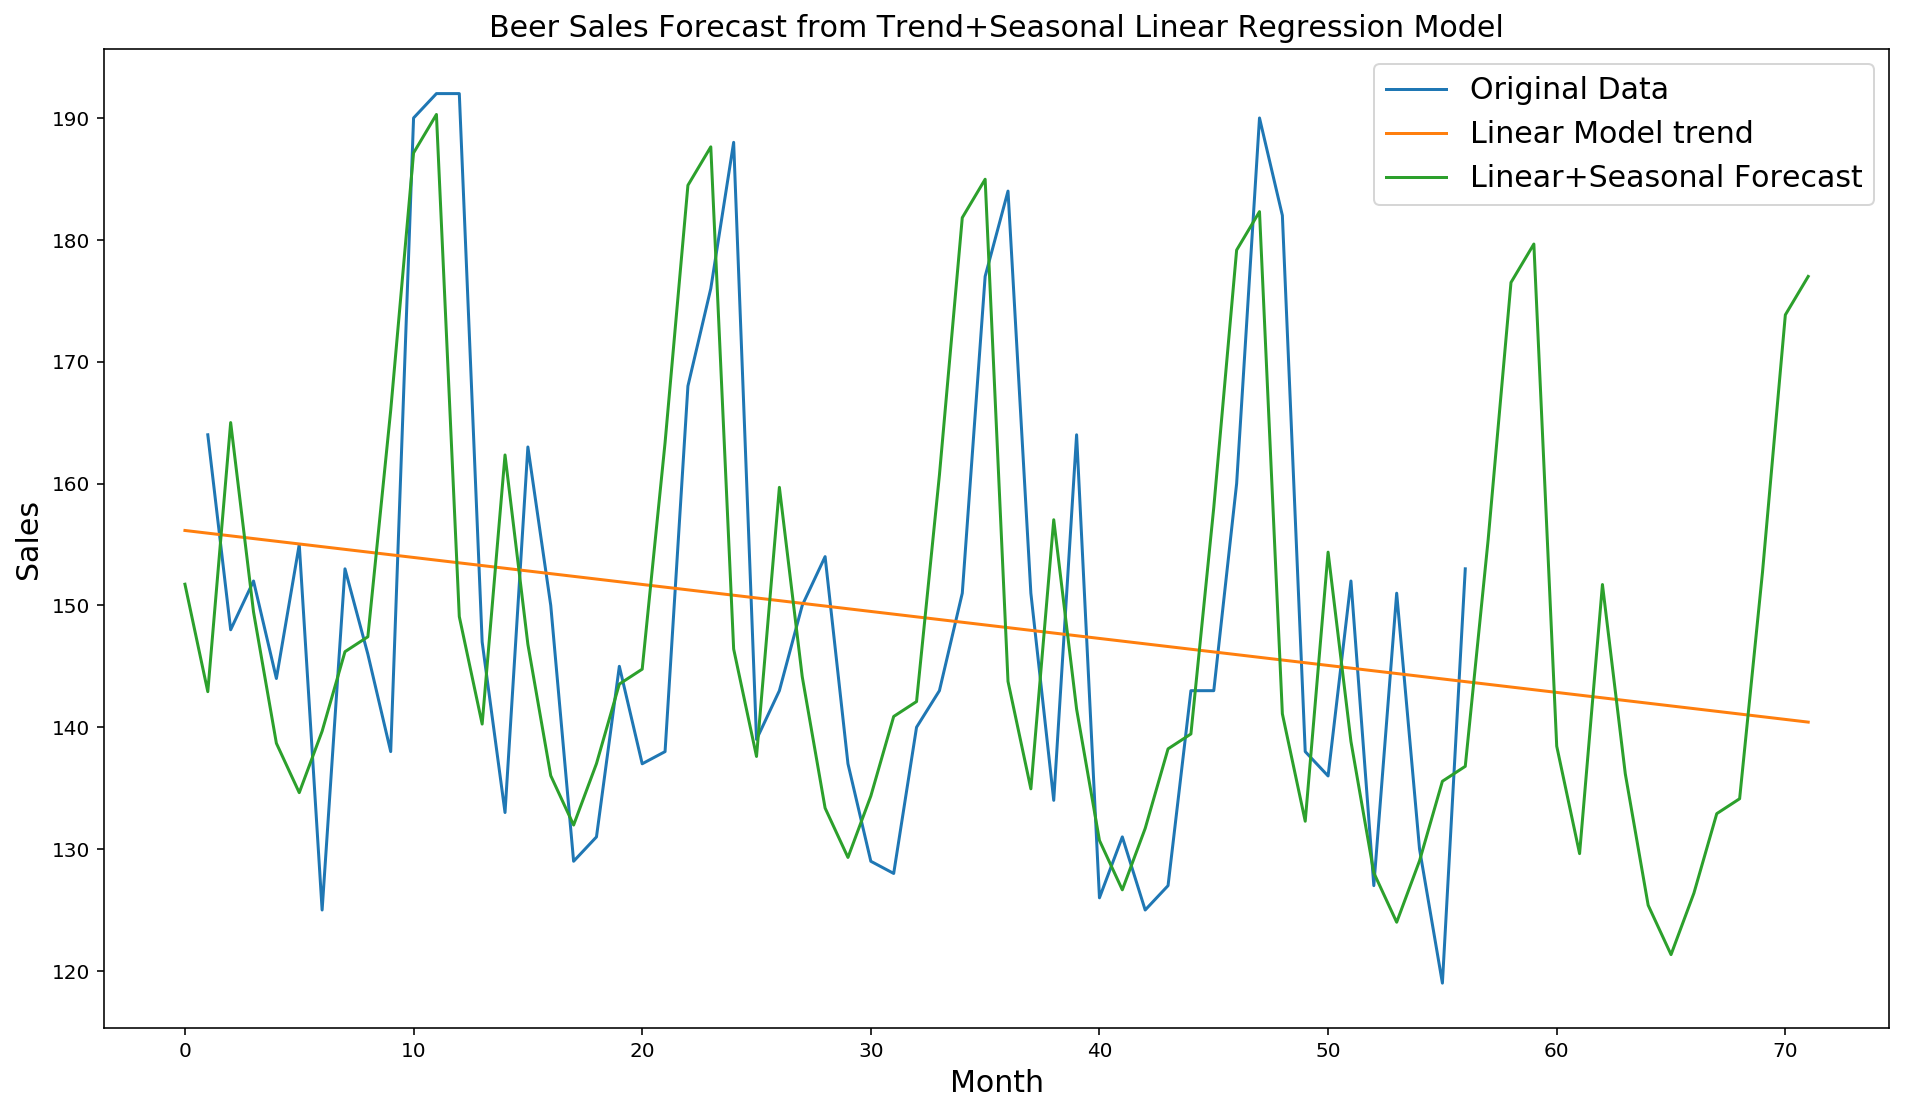

In [20]:
# forecast = trend + seasonal 
# we used a simple linear regression (trend = a*time + b) to capture the moving direction of trend 
# and use seasonal index from additive decomposition method to include periodical pattern within the time series
linear_seasonal_forecast = linear_trend + tiled_avg

# plot the results for comparison
plt.figure(figsize = (16, 9))
plt.plot(X, y, label="Original Data")
plt.plot(linear_trend, label="Linear Model trend")
plt.plot(linear_seasonal_forecast, label="Linear+Seasonal Forecast")
plt.title("Beer Sales Forecast from Trend+Seasonal Linear Regression Model", fontsize = 15)
plt.xlabel("Month", fontsize = 15)
plt.ylabel("Sales", fontsize = 15)
plt.legend(fontsize = 15);

Congratulations, you have learned our first algorithm for forecasting the time-series data.

### 3. Using linear regression for modeling trend and seasonal simultaneously

In Lecture 4, we introduce a method of using dummy variables to fit some patterns in time series. For seasonal patterns, we can use the so-called dummy predictors.  

In the previous example, we build a linear regression model for the trend-cycle component where the predictor was time t (from 1 to 56) and the model is

$$T_t = b_0+b_1 t$$

In the following example, we will build a regression model directly which is defined as

$$Y_t=b_0+b_1 t+b_2 d_{2,t}+b_3 d_{3,t}+b_4 d_{4,t}+b_5 d_{5,t}+b_6 d_{6,t}+b_7 d_{7,t}+b_8 d_{8,t}+b_9 d_{9,t}+b_10 d_{10,t}+b_11 d_{11,t}+b_12 d_{12,t}$$

where $d_{j,t}$ are dummy predictors corresponding to a particular month (if we are working on monthly data) and $b_j$ (j ≥ 2) are something similar to seasonal index in the decomposition model.

The above model is a <span class="mark">multiple linear regression model</span>.  To fit the model, the key is to organize the predictor values.

The values of dummy predictors $d_{j,t}$ are special values determined by the time t. In general, we shall have: 

1. When t (such as t=1, 13, 27, etc) is a January, we assume
$$d_{2,t} = d_{3,t} = ⋯ = d_{12,t} = 0$$
2. When t is a February, we assume:
$$d_{2,t} = 1 \; and \;others \;d = 0$$
3. When t is a March, we assume
$$d_{3,t} = 1 \; and \;others \;d = 0$$

4. ..
5. ..
6. When t is a December, we assume
$$d_{12,t} = 1 \; and \;others\; d = 0$$

For the regression, input data will look like

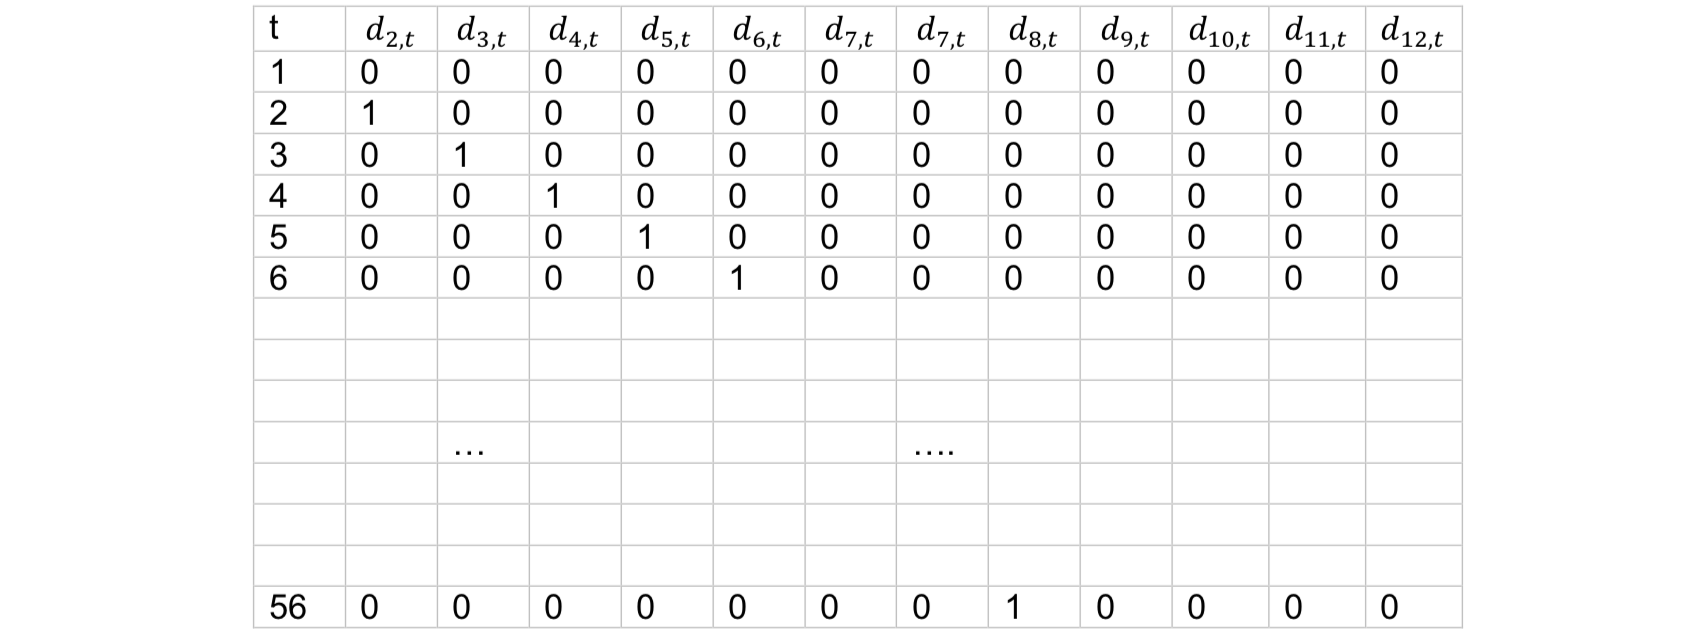

Each row corresponds to a time series value $Y_t$. Then do regression fitting.All these can be easily done in sklearn.

#### Step 1:  Load and Prepare Initial Data

In here you may refer to the first step in Task 1 to load the dataset. 
Check variables X and y in the variable explorer. Check their data types and shapes.

#### Step 2:  Prepare Dummy Predictors

In [39]:
# create a list indicating the month (Jan, Feb, ...) of each record
seasons = []
for i in range(y.size):
    if i % 12 == 0:
        seasons = np.append(seasons, 'Jan')
    if i % 12 == 1:
        seasons = np.append(seasons, 'Feb')   
    if i % 12 == 2:
        seasons = np.append(seasons, 'Mar')
    if i % 12 == 3:
        seasons = np.append(seasons, 'Apr')
    if i % 12 == 4:
        seasons = np.append(seasons, 'May')
    if i % 12 == 5:
        seasons = np.append(seasons, 'Jun')   
    if i % 12 == 6:
        seasons = np.append(seasons, 'Jul')
    if i % 12 == 7:
        seasons = np.append(seasons, 'Aug')
    if i % 12 == 8:
        seasons = np.append(seasons, 'Sep')
    if i % 12 == 9:
        seasons = np.append(seasons, 'Oct')   
    if i % 12 == 10:
        seasons = np.append(seasons, 'Nov')
    if i % 12 == 11:
        seasons = np.append(seasons, 'Dec')

Check variables `seasons` in the variable explorer. Check its data types and shapes. What are the values over there?

You note that the variable seasons contain string values such as 'Jan’, …, ‘Dec’.  They are so-called <span class="mark">categorical values</span>.

Now copy the following code into your program

In [72]:
# transfer the categorical values of seasons to dummy variables
dummies = pd.get_dummies(seasons, drop_first = True) 

# drop_first means drop the first dummy variable to prevent “dummy variable trap” 
# the trap would cause the regression to fail (multi-collinearity).

In [43]:
# check the transforming results
dummies

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,1,0


Check variables `dummies` in the variable explorer. Check its data types and shapes. What are the values over there?

You may note that the fourth row (corresponding to April) contains all 0.  This is because Python orders month names in alphabetic order.  Write down all the value in the first row which corresponding to Jan.  What are values?

It really does not matter which month’s dummy predictor values are all 0. The important thing is that <span class="girk">each month has its own dummy predictor values.</span>

#### Step 3:  Combining dummy predictors with our time predictor t

In [71]:
X = np.linspace(1, len(beer_df), len(beer_df))

In [73]:
# the variable type of dummies is a pandas DataFrame
# for modelling purpose, we shall concat its values with the original dataset (beer_df) 
dummies = dummies.values

# make sure the size of X and dummies match
# np.shape(dummies) = (56, 11)
# np.shape(X) = (56, 1)

X = X[:, np.newaxis]
# the np.newaxis command is used to increase the dimension of the existing array by one more dimension
# check: https://stackoverflow.com/questions/29241056/how-does-numpy-newaxis-work-and-when-to-use-it


# this line shall run only once, otherwise you would get 
# AttributeError: 'numpy.ndarray' object has no attribute 'values'
# in this case, just try:
# dummies = pd.get_dummies(seasons, drop_first=True) 
# run the above line again and rerun this cell

In [74]:
# Now we add these dummy features into feature, stacking along the column
Xnew = np.hstack((X, dummies))

# hstack: horizontal staking

# if you got 
# ValueError: all the input arrays must have same number of dimensions
# it results from the fact that you run np.newaxis multiple times. Try 
# X = np.linspace(1, len(beer_df), len(beer_df))
# define X again, and use X = X[:,np.newaxis] to update it
# then try this line again

Check variables `Xnew` in the variable explorer. Check its data types and shapes. What are the values over there?

In [76]:
# data type
Xnew.dtype

dtype('float64')

In [77]:
# size
Xnew.shape

(56, 12)

In [78]:
# values
Xnew
# (compare with the variable 'dummies')

array([[ 1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 2.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 6.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 7.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 8.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 9.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [11.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [12.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [13.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [14.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [15.,  0.,  0.,  0.,  0.,  

In [41]:
Xnew

NameError: name 'Xnew' is not defined

#### Step 4:  Doing regression

In [82]:
# Create linear regression object (model)
regr = LinearRegression()

# Train the model using the training sets
# now we have 1+11 independent variables
regr.fit(Xnew, y)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The intercept
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [ -0.21583333   4.46333333  46.73166667  -1.83166667   6.9525
  -5.1525     -11.76833333  15.78416667   0.61583333  43.76583333
  27.05         0.08416667]
Intercept: 
 146.24333333333433


**Step 5:  Showing Results**

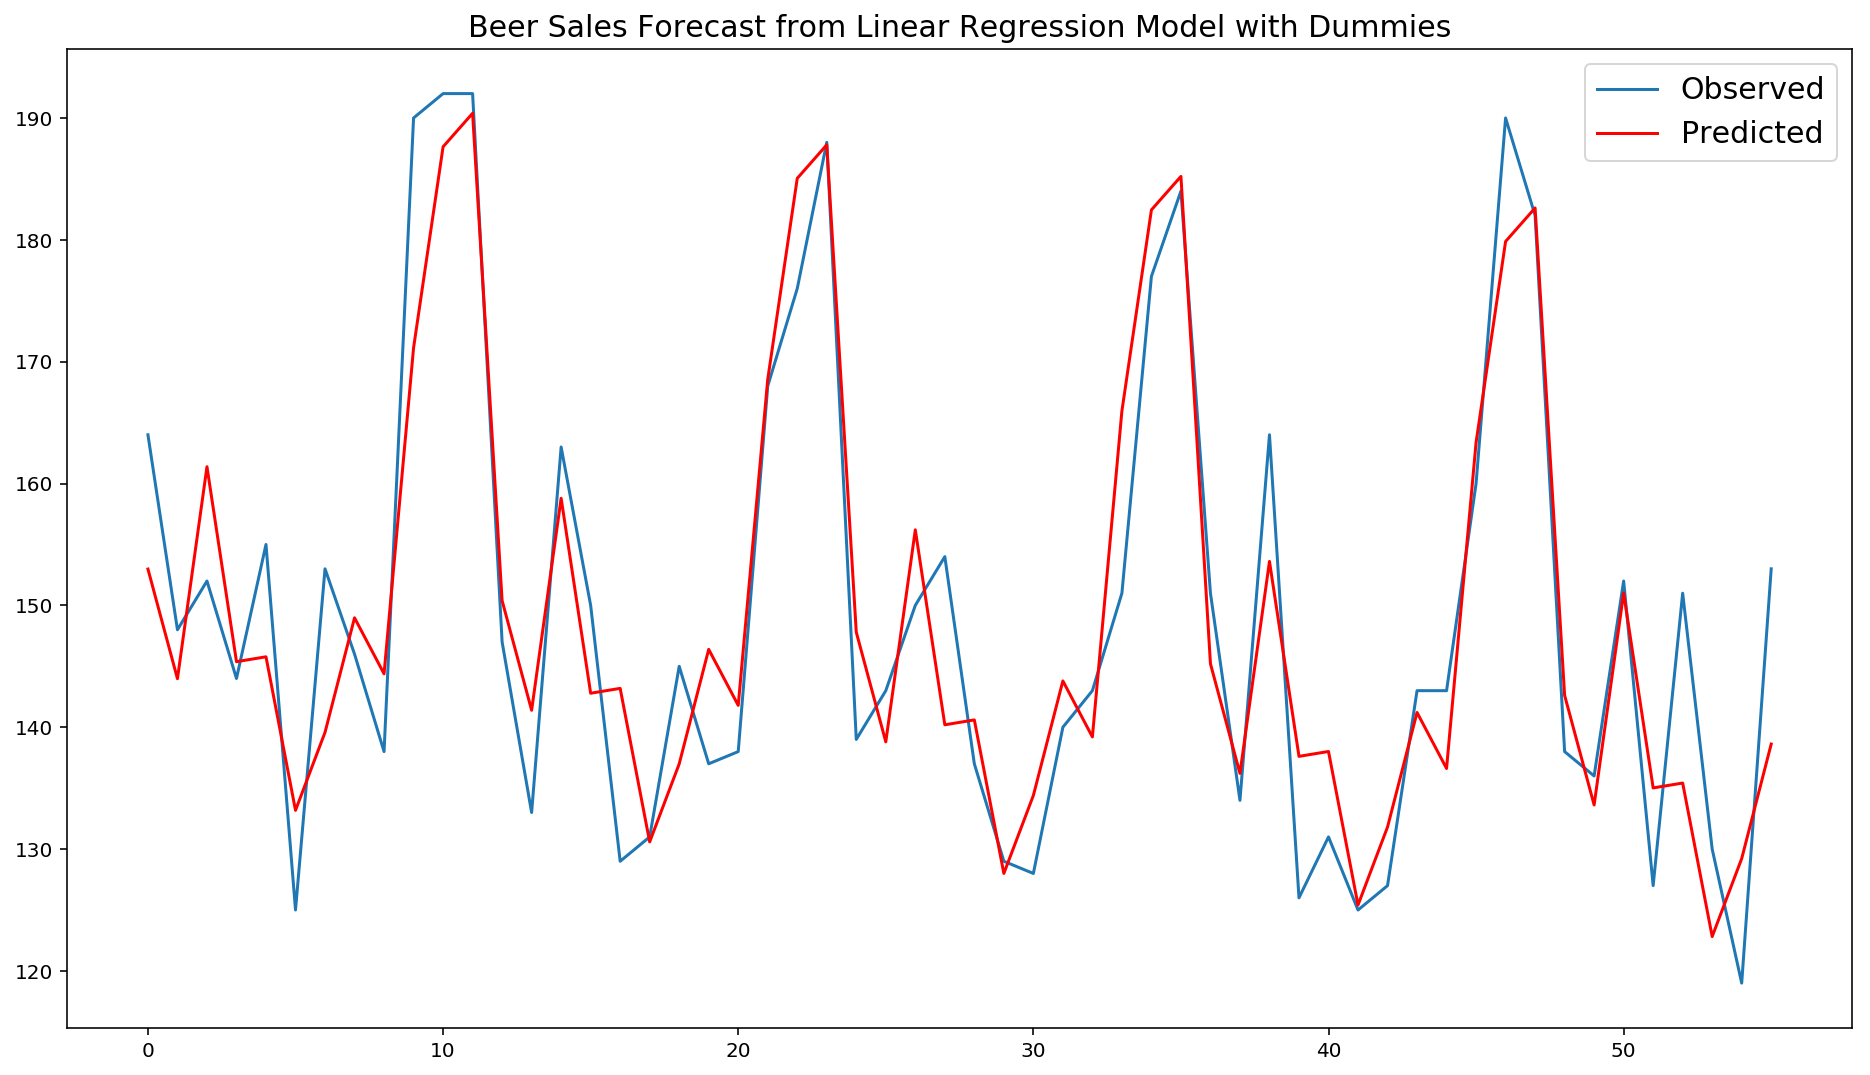

In [100]:
Ypred = regr.predict(Xnew) 

plt.figure(figsize = (16, 9))
plt.plot(y, label='Observed') # ground truth
plt.plot(Ypred, '-r', label='Predicted') # predictions
plt.title('Beer Sales Forecast from Linear Regression Model with Dummies', fontsize = 15)
plt.legend(fontsize = 15);

Regression is really powerful.   If we have found patterns and define appropriate predictors which describe those patterns, then we can do a good predictor model.

Think about other patterns identified in the lecture and the way to define predictors in python.

**key words**  
`np.linspace(start, stop, amount)`  


`LinearRegression()`  
`lm.fit(x, y)`  
`lm.predict(x)`  
`lm.coef_`  
`lm.intercept_`   

`pd.get_dummies(drop_first = True)`    
`np.hstack((var1, var2))`

In [ ]:
np.arange